# MTA Service Alerts - Exploratory Data Analysis

This is exploratory data analysis of my project: MTA (Metropolitan Transportation Authority) service alerts. The analysis includes text charsacteristics, temporal patterns, route distributions, and content analysis through various visualizations.


## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']
# Create EDA directory if it doesn't exist
os.makedirs('EDA', exist_ok=True)


## Load data


In [2]:
df = pd.read_csv('Preprocessed/MTA_Data_preprocessed.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()


Dataset shape: (230012, 6)

Columns: ['Alert ID', 'Date', 'Agency', 'Status Label', 'Affected', 'Header']


,Alert ID,Date,Agency,Status Label,Affected,Header
0,180128,11/05/2022 05:58:00 PM,NYCT Subway,delays,"[""A"", ""C""]",A C trains are delayed while we conduct emerge...
1,189489,12/20/2022 07:09:00 PM,NYCT Subway,delays,"[""L""]",L trains are running with delays in both direc...
2,189321,12/20/2022 12:31:00 AM,NYCT Subway,delays,"[""J""]",Jamaica-bound J trains are delayed while we re...
3,188948,12/18/2022 06:12:00 AM,NYCT Subway,delays,"[""Q""]",Southbound Q trains are running with delays af...
4,187749,12/12/2022 02:26:00 PM,NYCT Subway,delays,"[""B"", ""C""]",Southbound B C trains are running with delays ...


## Missing values analysis


In [3]:
missing_data = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_pct.values
})

print("Missing Values Summary:")
missing_df


Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
0,Alert ID,0,0.0
1,Date,0,0.0
2,Agency,0,0.0
3,Status Label,0,0.0
4,Affected,0,0.0
5,Header,0,0.0


## Dataset overview


In [4]:
print(f"Total number of alerts: {len(df):,}")
print(f"\nData types:")
df.dtypes


Total number of alerts: 230,012

Data types:


Alert ID         int64
Date            object
Agency          object
Status Label    object
Affected        object
Header          object
dtype: object

## Text length analysis

Analyzing the length characteristics of alert headers in terms of tokens and characters.


In [5]:
df['token_count'] = df['Header'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
df['char_length'] = df['Header'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

stats_df = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std', 'Min', 'Max'],
    'Token_Count': [
        df['token_count'].mean(),
        df['token_count'].median(),
        df['token_count'].std(),
        df['token_count'].min(),
        df['token_count'].max()
    ],
    'Character_Length': [
        df['char_length'].mean(),
        df['char_length'].median(),
        df['char_length'].std(),
        df['char_length'].min(),
        df['char_length'].max()
    ]
})

print("Text Length Statistics:")
stats_df


Text Length Statistics:


,Metric,Token_Count,Character_Length
0,Mean,21.866116,124.556497
1,Median,20.000000,115.000000
2,Std,11.777776,66.914206
3,Min,1.000000,5.000000
4,Max,441.000000,2518.000000


## Distribution of token counts


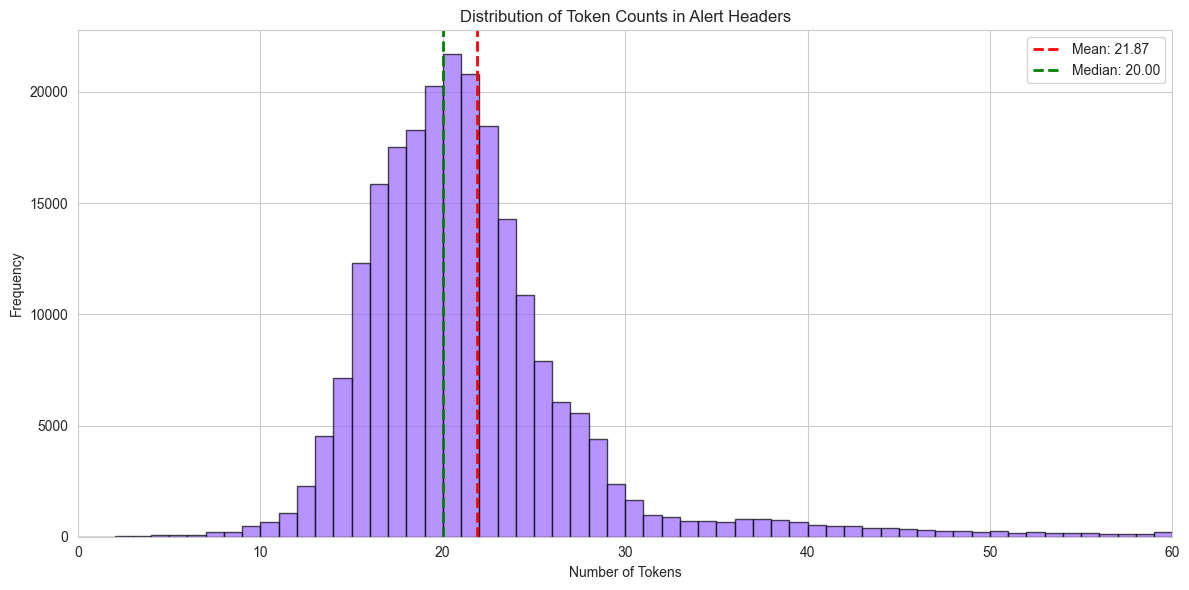

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(df['token_count'], bins=60, range=(0, 60), edgecolor='black', alpha=0.7, color=colors[0])
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Token Counts in Alert Headers')
plt.axvline(df['token_count'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["token_count"].mean():.2f}')
plt.axvline(df['token_count'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df["token_count"].median():.2f}')
plt.legend()
plt.xlim(0, 60)
plt.tight_layout()
plt.savefig('EDA/token_count_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Distribution of character length


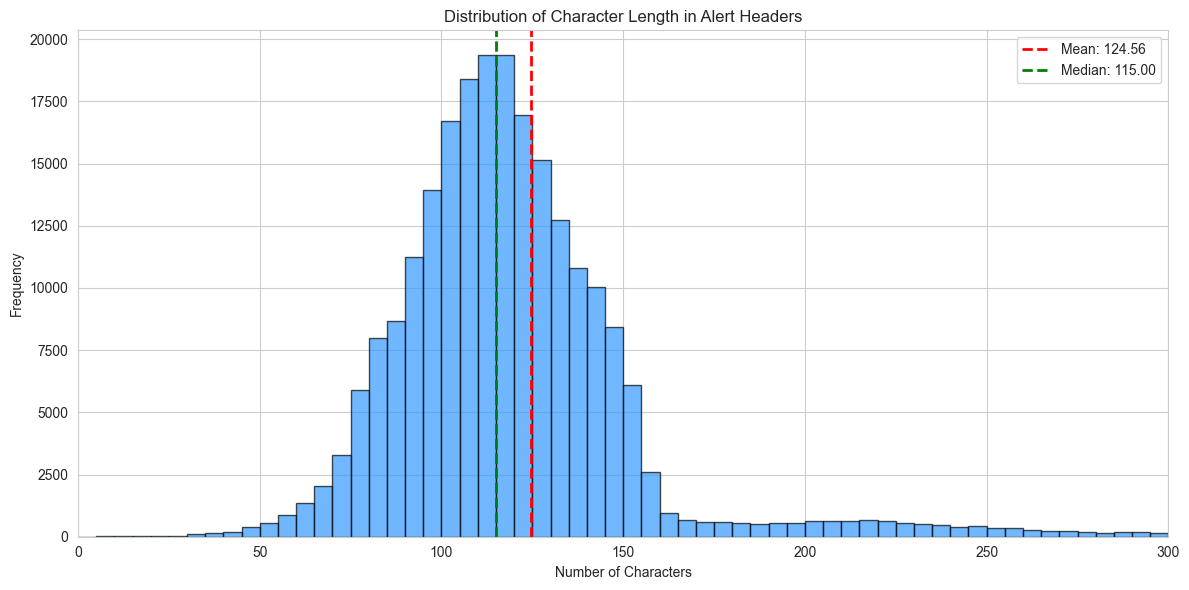

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(df['char_length'], bins=60, range=(0, 300), edgecolor='black', alpha=0.7, color=colors[1])
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Character Length in Alert Headers')
plt.axvline(df['char_length'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["char_length"].mean():.2f}')
plt.axvline(df['char_length'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df["char_length"].median():.2f}')
plt.legend()
plt.xlim(0, 300)
plt.tight_layout()
plt.savefig('EDA/char_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Agency distribution


In [8]:
agency_counts = df['Agency'].value_counts()
print("Alerts by Agency:")
print(agency_counts)
print(f"\nPercentage distribution:")
print((agency_counts / len(df) * 100).round(2))


Alerts by Agency:
Agency
NYCT Subway    166737
NYCT Bus        63275
Name: count, dtype: int64

Percentage distribution:
Agency
NYCT Subway    72.49
NYCT Bus       27.51
Name: count, dtype: float64


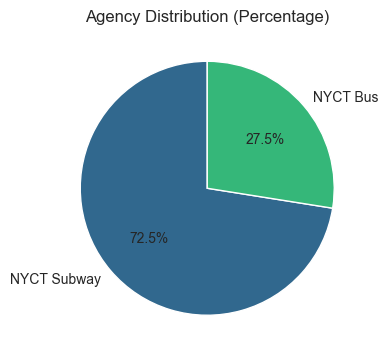

In [9]:
plt.figure(figsize=(4, 4))
plt.pie(agency_counts.values, labels=agency_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('viridis', len(agency_counts)))
plt.title('Agency Distribution (Percentage)')
plt.tight_layout()
plt.savefig('EDA/agency_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()


## Status label distribution


In [10]:
status_counts = df['Status Label'].value_counts()
print("Alerts by Status Label:")
print(status_counts)
print(f"\nPercentage distribution:")
print((status_counts / len(df) * 100).round(2))


Alerts by Status Label:
Status Label
delays                                               162452
cancellations                                         10247
buses-detoured                                         9336
local-to-express                                       5433
detour                                                 5419
                                                      ...  
multiple-changes | some-delays | local-to-express         1
express-to-local | trains-rerouted | slow-speeds          1
stations-skipped | slow-speeds                            1
multiple-changes | express-to-local | some-delays         1
on-or-close                                               1
Name: count, Length: 276, dtype: int64

Percentage distribution:
Status Label
delays                                               70.63
cancellations                                         4.45
buses-detoured                                        4.06
local-to-express                                

## Temporal analysis

Analyzing the distribution of alerts over time.


In [11]:
df['Date_parsed'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Year'] = df['Date_parsed'].dt.year
df['Month'] = df['Date_parsed'].dt.month

alerts_per_year = df['Year'].value_counts().sort_index()
alerts_year_df = pd.DataFrame({
    'Year': alerts_per_year.index,
    'Alert_Count': alerts_per_year.values
})

print("Alerts per Year:")
alerts_year_df


Alerts per Year:


,Year,Alert_Count
0,2020,18483
1,2021,33994
2,2022,46944
3,2023,46024
4,2024,49639
5,2025,34928


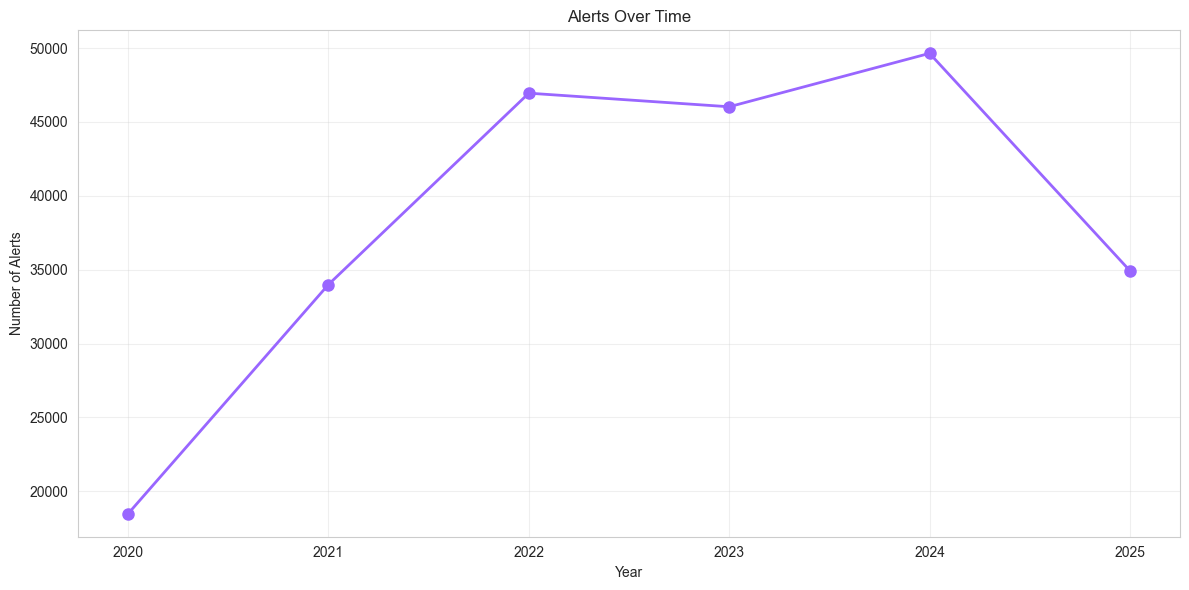

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(alerts_year_df['Year'], alerts_year_df['Alert_Count'], marker='o', 
         linewidth=2, markersize=8, color=colors[0])
plt.xlabel('Year')
plt.ylabel('Number of Alerts')
plt.title('Alerts Over Time')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('EDA/alerts_trend_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Route code analysis

Analyzing the distribution of route codes in the alerts. <br> <br>
Note: Single Route is the rows that mention only one route e.g "Q46" , Multiple Route is the rows that mention more than one route in a single alert. Such as; "Q32, Bx16".


In [13]:
def parse_affected(affected_str):
    try:
        return json.loads(affected_str)
    except:
        return []

df['affected_routes'] = df['Affected'].apply(parse_affected)
df['num_routes'] = df['affected_routes'].apply(len)

single_route = (df['num_routes'] == 1).sum()
multiple_routes = (df['num_routes'] > 1).sum()
no_routes = (df['num_routes'] == 0).sum()

route_dist_df = pd.DataFrame({
    'Category': ['No Routes', 'Single Route', 'Multiple Routes', 'Total'],
    'Count': [no_routes, single_route, multiple_routes, len(df)],
    'Percentage': [
        (no_routes / len(df) * 100).round(2),
        (single_route / len(df) * 100).round(2),
        (multiple_routes / len(df) * 100).round(2),
        100.00
    ]
})

print("Route Distribution Summary:")
route_dist_df


Route Distribution Summary:


,Category,Count,Percentage
0,No Routes,0,0.00
1,Single Route,144282,62.73
2,Multiple Routes,85730,37.27
3,Total,230012,100.00


In [14]:
route_counts = df['num_routes'].value_counts().sort_index().head(10)
print("\nDistribution by exact number of routes (Top 10):")
print(route_counts)



Distribution by exact number of routes (Top 10):
num_routes
1     144282
2      58435
3      14929
4       6845
5       1629
6        799
7        560
8        437
9        273
10       196
Name: count, dtype: int64


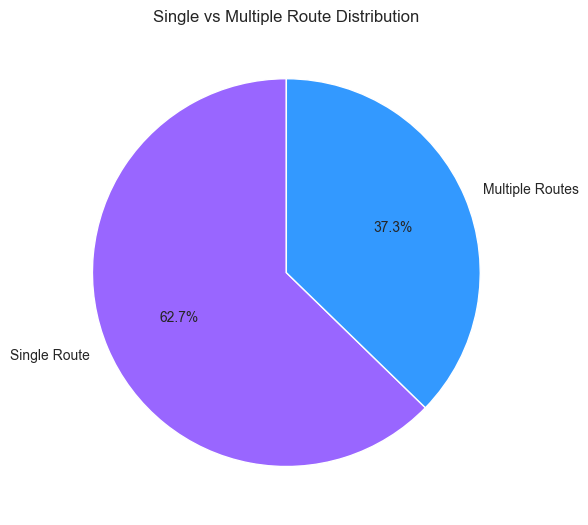

In [15]:
plt.figure(figsize=(6, 6))
route_categories = ['Single Route', 'Multiple Routes']
route_values = [single_route, multiple_routes]
plt.pie(route_values, labels=route_categories, autopct='%1.1f%%', 
        startangle=90, colors=[colors[0], colors[1]])
plt.title('Single vs Multiple Route Distribution')
plt.tight_layout()
plt.savefig('EDA/route_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()


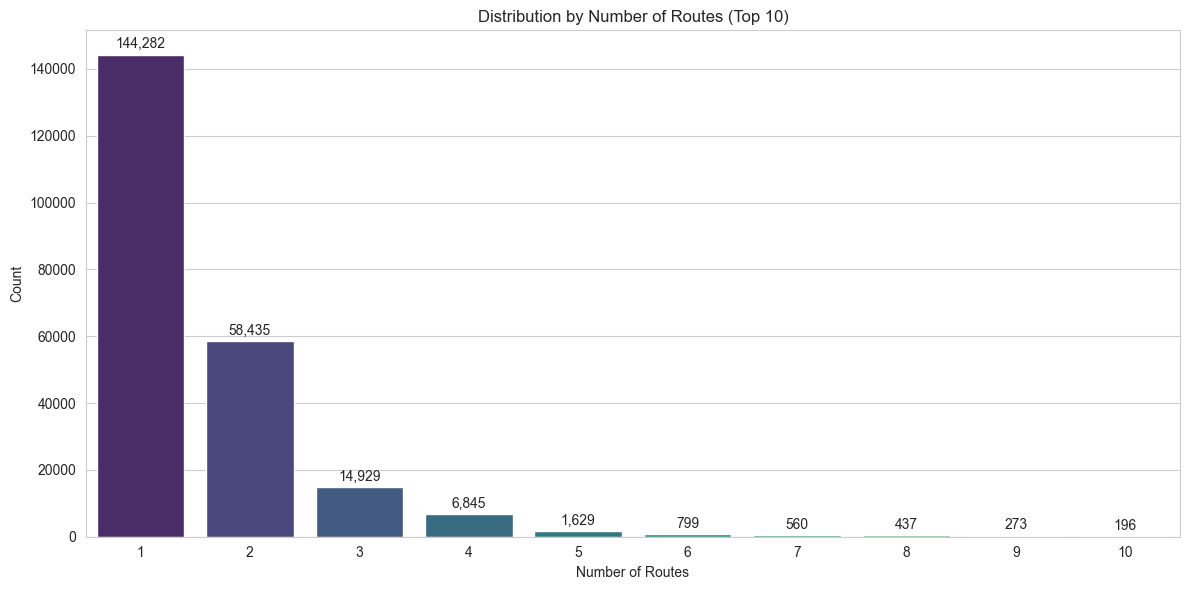

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=route_counts.index, y=route_counts.values, palette='viridis')
plt.xlabel('Number of Routes')
plt.ylabel('Count')
plt.title('Distribution by Number of Routes (Top 10)')
for i, v in enumerate(route_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('EDA/exact_route_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


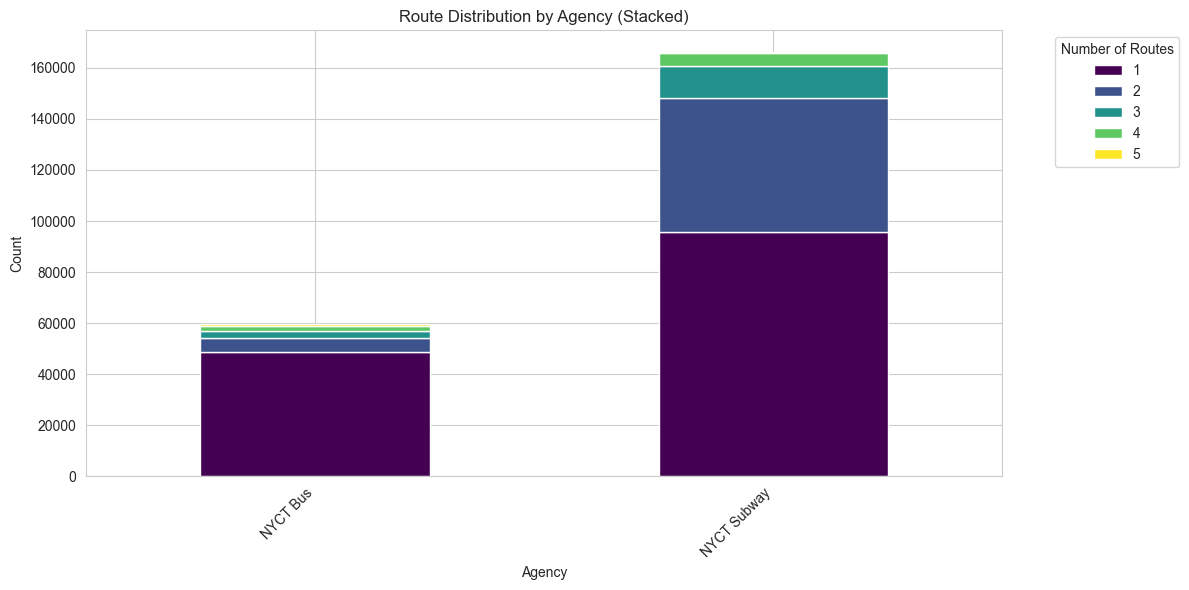

In [17]:
route_by_agency = df.groupby(['Agency', 'num_routes']).size().unstack(fill_value=0)
route_by_agency_top = route_by_agency[[col for col in route_by_agency.columns if col <= 5]]

plt.figure(figsize=(12, 6))
route_by_agency_top.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Route Distribution by Agency (Stacked)')
plt.legend(title='Number of Routes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('EDA/route_by_agency_stacked.png', dpi=300, bbox_inches='tight')
plt.show()


## N-grams analysis

Extracting and visualizing the most common bigrams and trigrams in alert headers.


In [18]:
def get_ngrams(text, n):
    words = text.lower().split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

all_bigrams = []
all_trigrams = []

for header in df['Header'].dropna():
    all_bigrams.extend(get_ngrams(str(header), 2))
    all_trigrams.extend(get_ngrams(str(header), 3))

bigram_counts = Counter(all_bigrams).most_common(20)
trigram_counts = Counter(all_trigrams).most_common(20)

bigrams_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Frequency'])
trigrams_df = pd.DataFrame(trigram_counts, columns=['Trigram', 'Frequency'])

print("Top 20 Bigrams:")
print(bigrams_df.head(10))


Top 20 Bigrams:
         Bigram  Frequency
0    trains are     148559
1   are running      92954
2   with delays      70399
3  running with      67432
4       a train      59440
5      while we      50649
6  delays after      49929
7      after we      47946
8   are delayed      47003
9       in both      38548


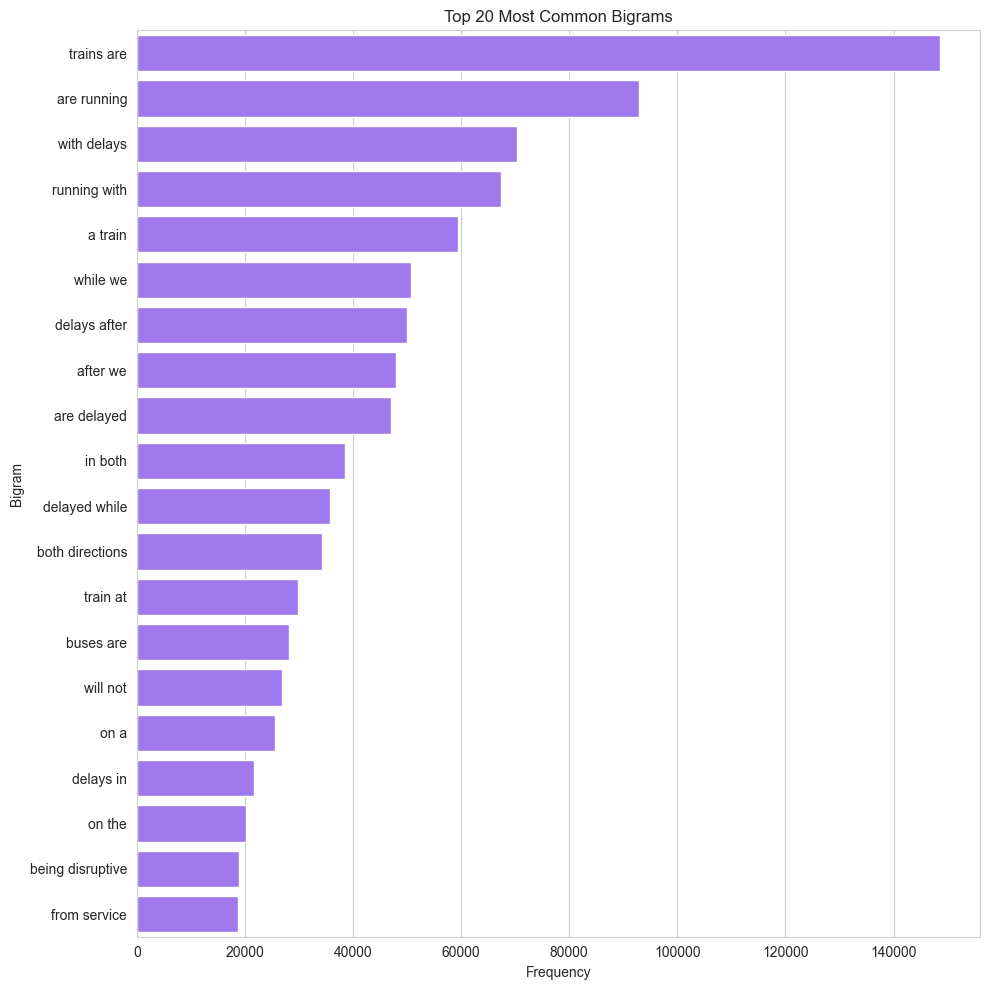

In [19]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, color=colors[0])
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 20 Most Common Bigrams')
plt.tight_layout()
plt.savefig('EDA/top_bigrams.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
print("Top 20 Trigrams:")
print(trigrams_df.head(10))


Top 20 Trigrams:
               Trigram  Frequency
0   trains are running      88440
1     are running with      66879
2  running with delays      64224
3    with delays after      49416
4   trains are delayed      45497
5    are delayed while      35661
6   in both directions      34241
7      delays after we      33167
8           a train at      29161
9     delayed while we      28043


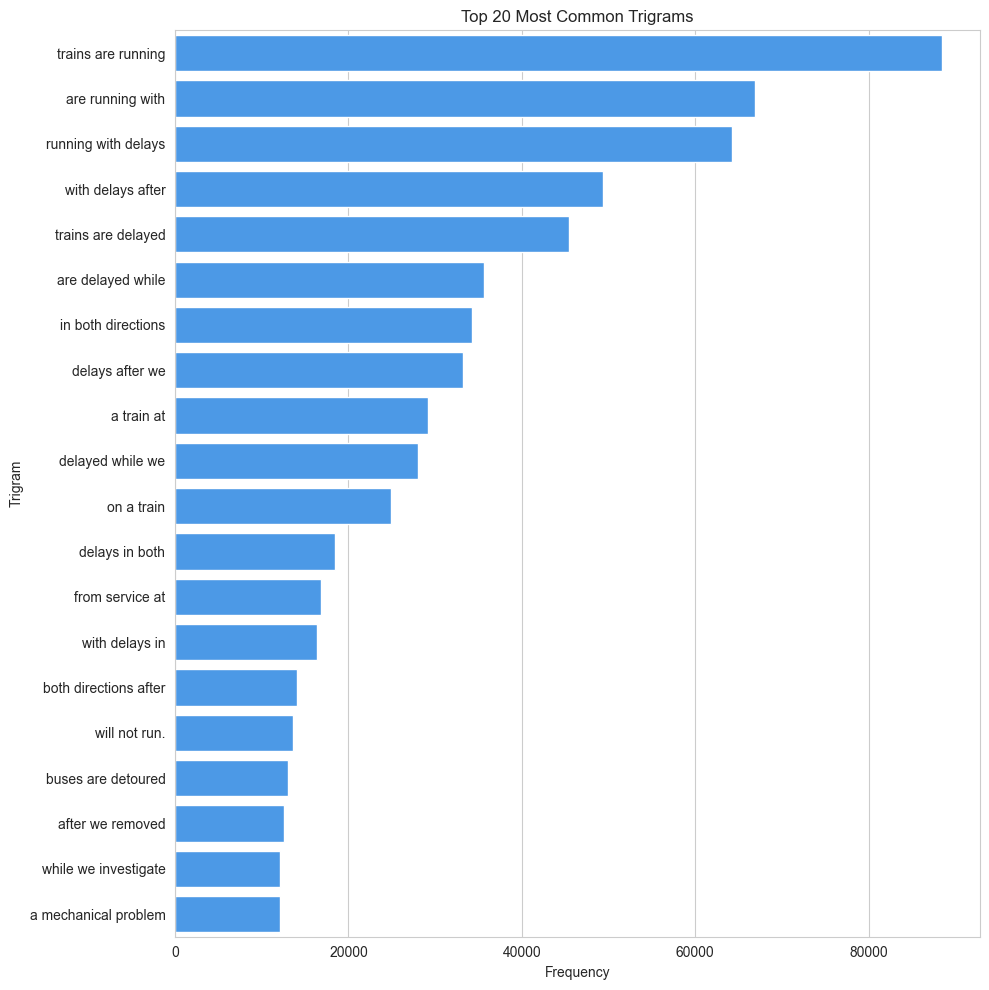

In [21]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df, color=colors[1])
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 20 Most Common Trigrams')
plt.tight_layout()
plt.savefig('EDA/top_trigrams.png', dpi=300, bbox_inches='tight')
plt.show()


## Direction Analysis

Analysis of my auto-labeled direction data in MTA alerts (As Silver Labeled Data). 

Directions are classified into categories: <br><br>
-COMPASS - (North/South/East/West), <br>
-BOROUGH - (Manhattan/Queens/Bronx/Brooklyn/Staten Island), <br>
-LOCAL - (Uptown/Downtown), <br>
-PLACE_BOUND, <br>
-BOTH_DIRECTIONS,<br>
-UNSPECIFIED.


In [22]:
# Load direction-labeled data
df_directions = pd.read_csv('Preprocessed/MTA_Data_silver_directions.csv')

# Parse direction labels from JSON strings
direction_labels_all = []
for idx, row in df_directions.iterrows():
    labels = json.loads(row['direction_labels'])
    direction_labels_all.extend(labels)

# Count each direction type
direction_counts = Counter(direction_labels_all)
print(f"Total direction labels extracted: {len(direction_labels_all):,}")
print(f"\nDirection type distribution:")
for direction, count in direction_counts.most_common():
    print(f"  {direction}: {count:,}")


Total direction labels extracted: 253,980

Direction type distribution:
  SOUTHBOUND: 59,521
  NORTHBOUND: 58,911
  UNSPECIFIED: 48,331
  BOTH_DIRECTIONS: 43,070
  PLACE_BOUND: 25,531
  WESTBOUND: 3,364
  DOWNTOWN: 3,096
  UPTOWN: 3,071
  EASTBOUND: 3,010
  MANHATTAN_BOUND: 2,636
  QUEENS_BOUND: 1,286
  BROOKLYN_BOUND: 1,217
  BRONX_BOUND: 785
  STATENISLAND_BOUND: 151


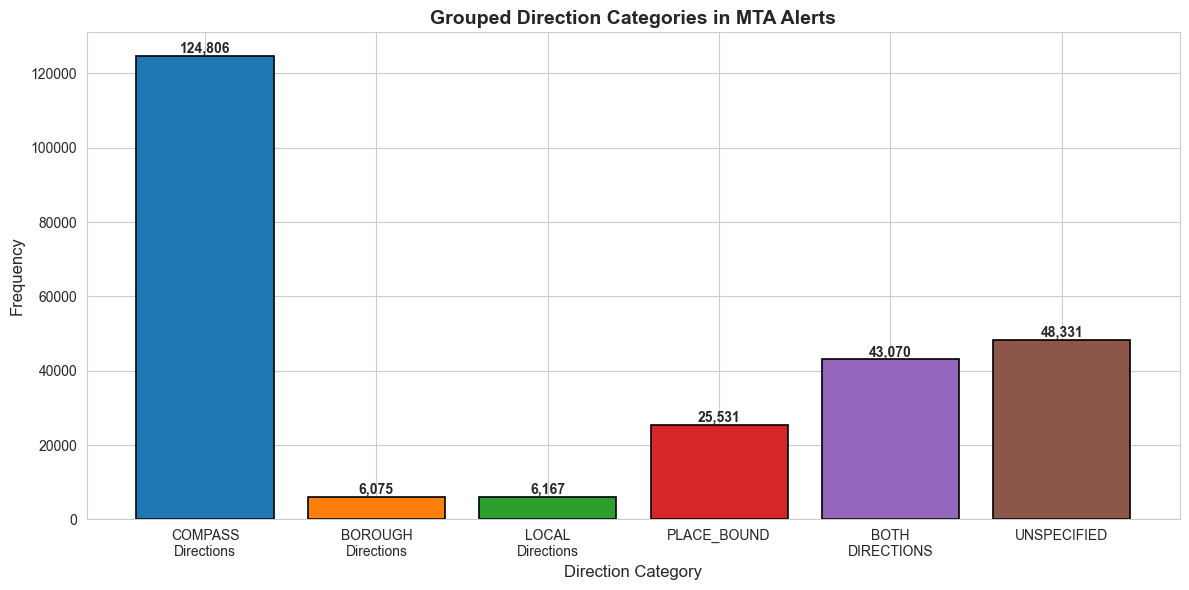


Grouped direction categories:
  COMPASS Directions: 124,806
  BOROUGH Directions: 6,075
  LOCAL Directions: 6,167
  PLACE_BOUND: 25,531
  BOTH DIRECTIONS: 43,070
  UNSPECIFIED: 48,331


In [23]:
# Breakdown of specific direction categories
compass_labels = ['NORTHBOUND', 'SOUTHBOUND', 'EASTBOUND', 'WESTBOUND']
borough_labels = ['MANHATTAN_BOUND', 'QUEENS_BOUND', 'BRONX_BOUND', 'BROOKLYN_BOUND', 'STATENISLAND_BOUND']
local_labels = ['UPTOWN', 'DOWNTOWN']

compass_count = sum(direction_counts[l] for l in compass_labels if l in direction_counts)
borough_count = sum(direction_counts[l] for l in borough_labels if l in direction_counts)
local_count = sum(direction_counts[l] for l in local_labels if l in direction_counts)
place_count = direction_counts.get('PLACE_BOUND', 0)
both_count = direction_counts.get('BOTH_DIRECTIONS', 0)
unspecified_count = direction_counts.get('UNSPECIFIED', 0)

# Create grouped data
grouped_data = pd.DataFrame({
    'Category': ['COMPASS\nDirections', 'BOROUGH\nDirections', 'LOCAL\nDirections', 
                 'PLACE_BOUND', 'BOTH\nDIRECTIONS', 'UNSPECIFIED'],
    'Count': [compass_count, borough_count, local_count, place_count, both_count, unspecified_count]
})

# Create visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data['Category'], grouped_data['Count'], 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
               edgecolor='black', linewidth=1.2)

plt.xlabel('Direction Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Grouped Direction Categories in MTA Alerts', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('EDA/direction_categories_grouped.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrouped direction categories:")
for idx, row in grouped_data.iterrows():
    print(f"  {row['Category'].replace(chr(10), ' ')}: {row['Count']:,}")


## The Number of Directions

Note: Single Direction is the rows with only one direction defined in them such as: "Queens-Bound". <br>
Whereas Multiple Direction is the rows with more than one direction in them such as: "SouthBound","NorthBound" <br><br>
They are important since my research is focusing on finding multiple Route/Direction pairs.

In [24]:
# Analyze number of directions per alert
direction_counts_per_alert = []
for idx, row in df_directions.iterrows():
    labels = json.loads(row['direction_labels'])
    # Count UNSPECIFIED as 0 directions
    if labels == ['UNSPECIFIED']:
        num_directions = 0
    else:
        num_directions = len(labels)
    direction_counts_per_alert.append(num_directions)

# Count frequency of each direction count
count_distribution = Counter(direction_counts_per_alert)

# Create summary categories
zero_direction = count_distribution.get(0, 0)
single_direction = count_distribution.get(1, 0)
multiple_directions = sum(count_distribution.get(k, 0) for k in count_distribution.keys() if k > 1)

print(f"\nDirection count per alert:")
print(f"  No direction (UNSPECIFIED): {zero_direction:,} ({zero_direction/len(df_directions)*100:.2f}%)")
print(f"  Single direction: {single_direction:,} ({single_direction/len(df_directions)*100:.2f}%)")
print(f"  Multiple directions: {multiple_directions:,} ({multiple_directions/len(df_directions)*100:.2f}%)")



Direction count per alert:
  No direction (UNSPECIFIED): 48,331 (21.01%)
  Single direction: 162,882 (70.81%)
  Multiple directions: 18,799 (8.17%)


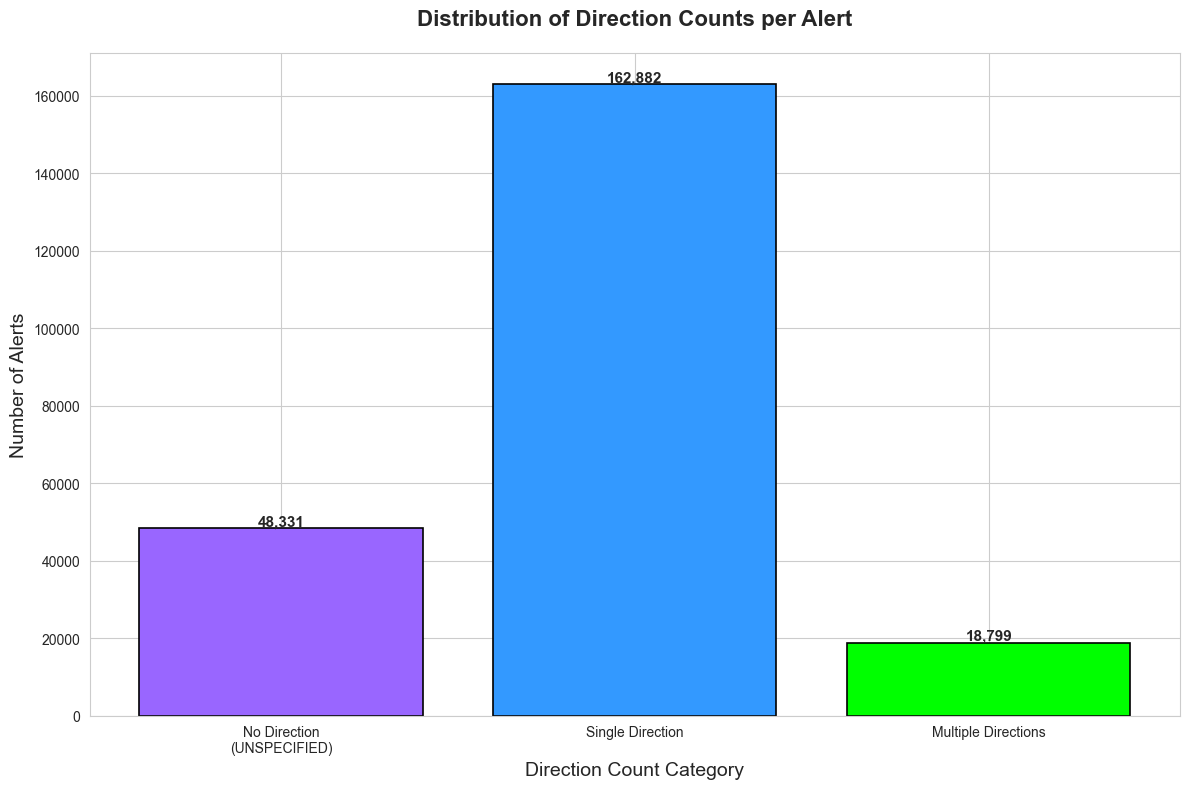

In [25]:
# Create visualization for direction count distribution
summary_data = pd.DataFrame({
    'Category': ['No Direction\n(UNSPECIFIED)', 'Single Direction', 'Multiple Directions'],
    'Count': [zero_direction, single_direction, multiple_directions]
})

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(summary_data['Category'], summary_data['Count'], color=colors[:3], edgecolor='black', linewidth=1.2)
ax.set_xlabel('Direction Count Category', fontsize=14)
ax.set_ylabel('Number of Alerts', fontsize=14)
ax.set_title('Distribution of Direction Counts per Alert', fontsize=16, fontweight='bold', pad=20)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('EDA/direction_count_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
